# Desafío - Pruebas de hipótesis

## 1. Evaluar juicios de hipótesis

A continuación se presenta una serie de enunciados de hipótesis. Usted debe discernir si es
posible rechazar la hipótesis nula.

<li>
    75 individuos elegidos al azar fueron alcanzados por activistas pro-LGTB que se
    identificaron como homosexuales, y 75 alcanzados por activistas pro-LGTB que se
    identificaron como heterosexuales. El objetivo era medir actitudes frente a la
    adopción homoparentales. La organización encargada de procesar los datos obtuvo
    los siguientes resultados:
    <ul>
        <li>El 67% de los encuestados por heterosexuales se mostró a favor de la
adopción homoparental, mientras que un 72% de los encuestados por
activistas que se identificaron como homosexuales se mostraron a favor de
la adopción homoparental.
</li>
        <li>Asumiendo que la hipótesis nula es que ambos porcentajes no son
diferentes, y la hipótesis alternativa es que existe una diferencia substancial
entre ambos.
</li>
        <li>Con p-valor de 0.1183 ¿es posible rechazar la hipótesis nula en favor de la
alternativa con una confianza de 95%?, ¿Cuanta es la confianza máxima con
la que sería posible rechazar la hipótesis nula en favor de la alternativa con
estos resultados?
</li>
    </ul>

</li>

In [4]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd

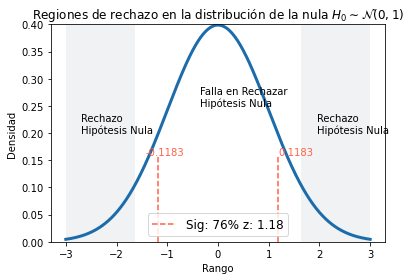

In [6]:
# Traemos la función que gráfica un p-value en una normal
def significance_threshold(cutoff, c):
    xaxis = np.linspace(-3, 3, 500)
    t_distribution = stats.t.pdf(xaxis, 500)
    cutoff_point = stats.t.ppf(cutoff, 500)
    plt.plot(xaxis, t_distribution, color='#1c6cab', lw=3)
    plt.axvline(cutoff_point, 0, 0.4, color=c, 
                label=r'Sig: {0}% z: {1}'.format(int((1-(2*cutoff)) * 100), -round(cutoff_point, 2)),
                linestyle='--')
    plt.annotate("{}".format(-cutoff), xy=(cutoff_point-.25, 0.16), color=c, )
    plt.axvline(-cutoff_point, 0, 0.4, color=c, linestyle='--')
    plt.annotate("{}".format(cutoff), xy=(-cutoff_point, 0.16), color=c)
    plt.annotate("Falla en Rechazar \nHipótesis Nula", xy=(-0.35,.25))
    plt.fill_between(xaxis, 0, .4, where=xaxis > 1.62, alpha=.1, facecolor='slategrey')
    plt.fill_between(xaxis, 0, .4, where=xaxis < -1.62, alpha=.1, facecolor='slategrey')
    plt.annotate("Rechazo \nHipótesis Nula", xy=(1.96, .20))
    plt.annotate("Rechazo \nHipótesis Nula", xy=(-2.7, .20))
    plt.legend(loc = 8, fontsize=12)
    plt.ylim(0, .40)
    plt.title(r'Regiones de rechazo en la distribución de la nula $H_{0}\sim\mathcal{N}(0,1)$')
    plt.ylabel('Densidad')
    plt.xlabel('Rango')

# Visualizamos el p-value del enunciado
significance_threshold(0.1183, 'tomato')

En respuesta al enunciado, <b>No es posible rechazar</b> la hipótesis nula con un 95%, y la confianza máxima con la que se puede rechazar la hipótesis es de un 76%.

## 2. Importe la base de datos utilizada la sesión presencial anterior

<li>Agregue una serie de variables binarias por cada continente de la variable region.
<ul><li><b>Tip:</b> Utilice <code>np.where</code> para ello.</li></ul></li>
<li>De manera similar a la sesión anterior, enfóquese en las siguientes variables:
<ul><li>Apellidos desde la A hasta la N: Enfocarse en las variables <code>chldmort</code>, <code>adfert</code>
y <code>life</code>.</li>
<li>Apellidos desde la N hasta la Z: Enfocarse en las variables <code>femlab</code>, <code>literacy</code>
y <code>school</code>.</li></ul></li>


In [20]:
df = pd.read_csv('nations.csv', encoding='latin')
df

,Unnamed: 0,country,region,gdp,school,adfert,chldmort,life,pop,urban,femlab,literacy,co2,gini
0,1,Algeria,Africa,7300.399902,6.716667,7.300000,34.75,72.316666,34172236,64.933334,0.4522,72.599998,15.00,NaN
1,2,Benin,Africa,1338.800049,3.100000,111.699997,122.75,54.733334,8237634,41.000000,0.8482,41.700001,1.20,NaN
2,3,Botswana,Africa,12307.400391,8.600000,52.099998,60.25,52.250000,1941233,59.250000,0.8870,84.099998,9.20,NaN
3,4,Burkina Faso,Africa,1063.400024,1.300000,124.800003,170.50,53.783333,15308383,23.583334,0.8584,23.600000,0.20,NaN
4,5,Burundi,Africa,349.200012,2.483333,18.600000,168.50,48.866665,7821783,10.250000,1.0344,66.599998,0.10,33.299999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,190,Samoa,Oceania,4012.600098,10.300000,28.299999,26.75,71.533333,181600,20.666668,0.5010,98.800003,3.10,NaN
190,191,Solomon Islands,Oceania,2249.199951,4.500000,70.300003,36.00,66.500000,503617,17.766666,0.4858,NaN,1.40,NaN
191,192,Tonga,Oceania,4072.199951,10.133333,22.299999,19.25,71.833336,102550,23.266666,0.7150,99.000000,4.85,NaN
192,193,Tuvalu,Oceania,NaN,NaN,23.299999,36.50,66.033333,9767,49.233334,NaN,NaN,NaN,NaN


In [23]:
continents = df['region'].unique()
# Crear columnas binarias
for i, n in enumerate(continents):
    df[n] = np.where(df['region'] == n, 1, 0)
# Ajustar Muestra para columnas seleccionadas
subSample = df.loc[: , np.concatenate((np.array(['country', 'chldmort', 'adfert', 'life']),continents))]
subSample

,country,chldmort,adfert,life,Africa,Americas,Asia,Europe,Oceania
0,Algeria,34.75,7.300000,72.316666,1,0,0,0,0
1,Benin,122.75,111.699997,54.733334,1,0,0,0,0
2,Botswana,60.25,52.099998,52.250000,1,0,0,0,0
3,Burkina Faso,170.50,124.800003,53.783333,1,0,0,0,0
4,Burundi,168.50,18.600000,48.866665,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
189,Samoa,26.75,28.299999,71.533333,0,0,0,0,1
190,Solomon Islands,36.00,70.300003,66.500000,0,0,0,0,1
191,Tonga,19.25,22.299999,71.833336,0,0,0,0,1
192,Tuvalu,36.50,23.299999,66.033333,0,0,0,0,1


## 3. Implemente una función de prueba de hipótesis a mano

<li>La función debe ingresar los siguientes argumentos:
<ul>
<li>df: La tabla de datos.</li>
<li>variable: La variable a analizar.</li>
<li>binarize: El indicador binario a utilizar.</li>
</ul></li></br>
<li><b>Tips</b>:
<ul>
<li>Separe la variable en dos, utilizando el indicador binario. Recuerde eliminar
los perdidos con dropna().</li>
<li>Implemente ttest_ind de scipy.stats y guarde el valor t y pval.</li>
<li>Reporte las medias para cada grupo (0 y 1).</li>
<li>Reporte la diferencia de entre las medias.</li>
<li>Reporte los valores t y p</li>
</ul></li>

In [48]:
def tryHipotesis(df, variable, binarize):
    tmp = df.copy()
    variable_zero = tmp[tmp[binarize] == 0][variable].dropna()
    variable_one = tmp[tmp[binarize] == 1][variable].dropna()
    statistic, pvalue = stats.ttest_ind(variable_one, variable_zero)
    print('Media de {} cuando es 1: {}'.format(binarize, round(variable_one.mean(),2)))
    print('Media de {} cuando es 0: {}'.format(binarize, round(variable_zero.mean(),2)))
    print('Diferencia de medias es {} '.format(round(variable_one.mean() - variable_zero.mean(),2)))
    print('t = {} y pvalue = {}'.format(round(statistic, 3), round(pvalue, 3)))

tryHipotesis(subSample, 'chldmort', 'Americas')

Media de Americas cuando es 1: 23.26
Media de Americas cuando es 0: 53.05
Diferencia de medias es -29.79 
t = -3.086 y pvalue = 0.002


## 4. Implemente una función que grafique los histogramas para ambas muestras.

<li>Genere una función que devuelva un gráfico donde visualice los dos histogramas
cuando la variable es 1 y 0, respectivamente.
<ul>
<li><b>Tips:</b> Refactorize la función incluyendo el método <code>hist</code> de
<code>matplotlib.pyplot</code>. Incluya los argumentos <code>alpha</code> y <code>label</code>.</li>
</ul></li>
<li>Para las tres variables de interés acorde a su grupo, analice las diferencias de
medias por cada continente, y posteriormente grafique. Concluya con los principales
resultados al respecto.
</li>



In [77]:
# Función que gráfica dos histograma de una variable específica, separadas según una variable Binaria
def plotHists(df, variable, binarize, alpha, label):
    tmp = df.copy()
    variable_zero = tmp[tmp[binarize] == 0][variable].dropna()
    variable_one = tmp[tmp[binarize] == 1][variable].dropna()
    fig, ax = plt.subplots(1, 2)
    ax[0].hist(variable_zero, label=label, alpha=alpha)
    ax[0].set_title('{} = 0'.format(binarize))
    ax[1].hist(variable_one, label=label, alpha=alpha)
    ax[1].set_title('{} = 1'.format(binarize))
    plt.suptitle(label)
# Función de utilidad para el análisis de las variables
def analyzeVars(var):
    # Analizar la variable con respecto a todos los continentes
    for continent in continents:
        print('Analizando {}'.format(continent))
        tryHipotesis(subSample, var, continent)
        plotHists(subSample, var, continent, 0.8, 'Análisis de {} para {}'.format(var, continent))
        print('============')

Analizando Africa
Media de Africa cuando es 1: 109.75
Media de Africa cuando es 0: 24.75
Diferencia de medias es 85.0 
t = 14.174 y pvalue = 0.0
Analizando Americas
Media de Americas cuando es 1: 23.26
Media de Americas cuando es 0: 53.05
Diferencia de medias es -29.79 
t = -3.086 y pvalue = 0.002
Analizando Asia
Media de Asia cuando es 1: 37.1
Media de Asia cuando es 0: 51.14
Diferencia de medias es -14.04 
t = -1.603 y pvalue = 0.111
Analizando Europe
Media de Europe cuando es 1: 7.05
Media de Europe cuando es 0: 59.29
Diferencia de medias es -52.24 
t = -6.262 y pvalue = 0.0
Analizando Oceania
Media de Oceania cuando es 1: 39.42
Media de Oceania cuando es 0: 48.34
Diferencia de medias es -8.93 
t = -0.628 y pvalue = 0.531


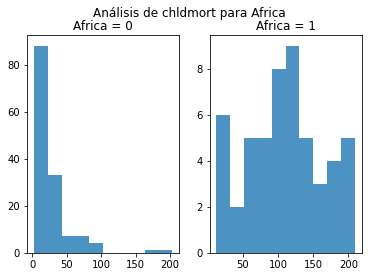

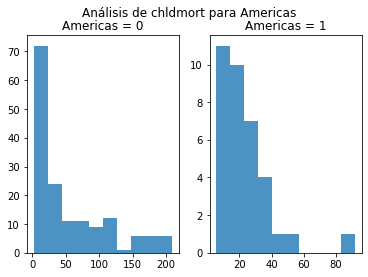

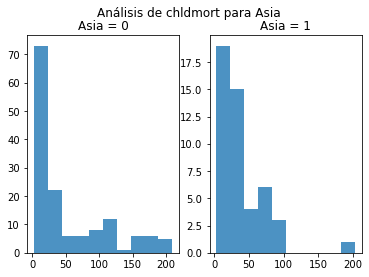

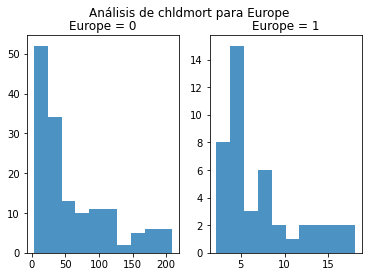

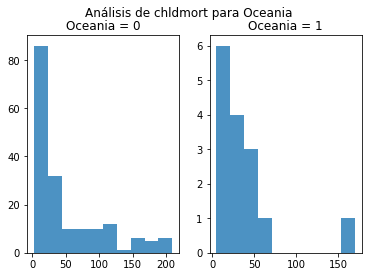

In [78]:
analyzeVars('chldmort')

Para la variable <code>chldmort</code> podemos notar que el continente que varía menos respecto al resto del mundo es Oceanía, mientras que Africa es el continente que mas varía respecto al resto.

Analizando Africa
Media de Africa cuando es 1: 92.72
Media de Africa cuando es 0: 36.83
Diferencia de medias es 55.89 
t = 9.444 y pvalue = 0.0
Analizando Americas
Media de Americas cuando es 1: 63.66
Media de Americas cuando es 0: 49.21
Diferencia de medias es 14.45 
t = 1.766 y pvalue = 0.079
Analizando Asia
Media de Asia cuando es 1: 33.87
Media de Asia cuando es 0: 57.88
Diferencia de medias es -24.01 
t = -3.386 y pvalue = 0.001
Analizando Europe
Media de Europe cuando es 1: 15.54
Media de Europe cuando es 0: 62.15
Diferencia de medias es -46.61 
t = -6.798 y pvalue = 0.0
Analizando Oceania
Media de Oceania cuando es 1: 44.99
Media de Oceania cuando es 0: 52.39
Diferencia de medias es -7.39 
t = -0.623 y pvalue = 0.534


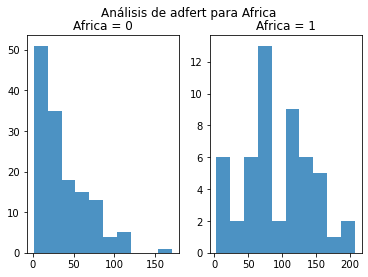

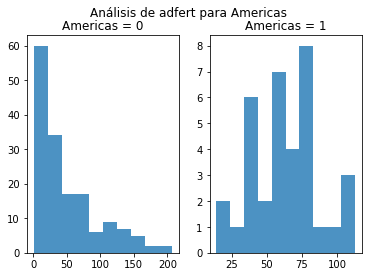

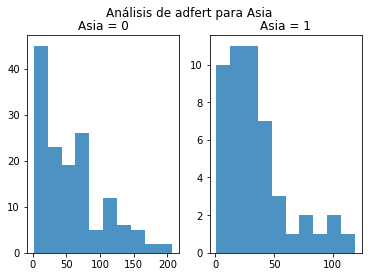

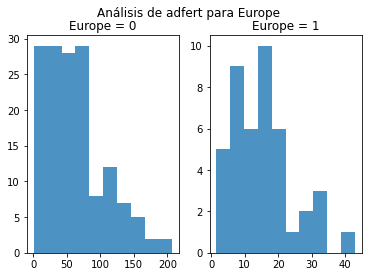

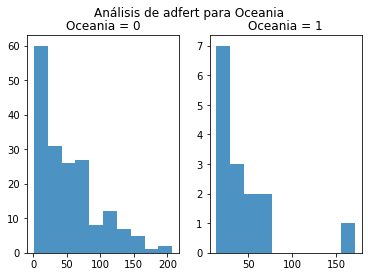

In [79]:
analyzeVars('adfert')

Parecido a <code>chldmort</code>, el análisis de la variable <code>adfert</code> muestra que el continente que varía menos respecto al resto del mundo es Oceanía, mientras que Africa es el continente que mas varía respecto al resto.

Analizando Africa
Media de Africa cuando es 1: 56.49
Media de Africa cuando es 0: 73.21
Diferencia de medias es -16.72 
t = -15.175 y pvalue = 0.0
Analizando Americas
Media de Americas cuando es 1: 73.45
Media de Americas cuando es 0: 67.69
Diferencia de medias es 5.76 
t = 3.138 y pvalue = 0.002
Analizando Asia
Media de Asia cuando es 1: 70.87
Media de Asia cuando es 0: 68.01
Diferencia de medias es 2.87 
t = 1.735 y pvalue = 0.084
Analizando Europe
Media de Europe cuando es 1: 76.95
Media de Europe cuando es 0: 66.39
Diferencia de medias es 10.56 
t = 6.735 y pvalue = 0.0
Analizando Oceania
Media de Oceania cuando es 1: 69.58
Media de Oceania cuando es 0: 68.66
Diferencia de medias es 0.93 
t = 0.342 y pvalue = 0.733


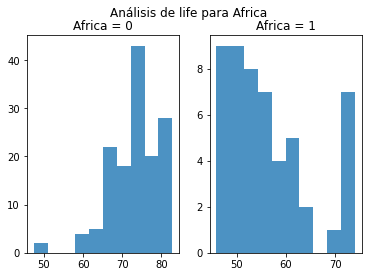

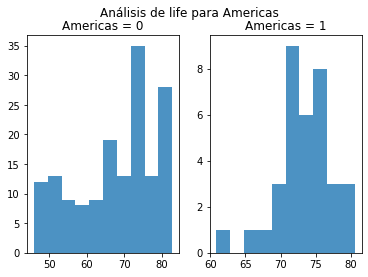

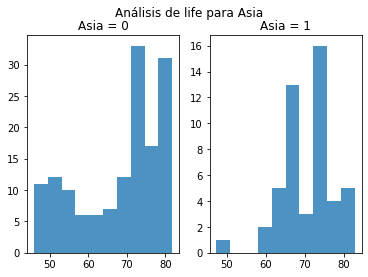

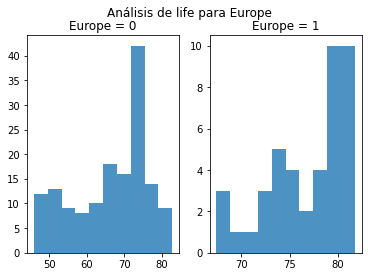

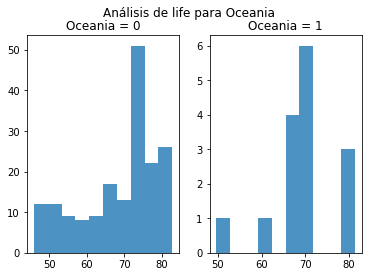

In [80]:
analyzeVars('life')

En congruencia con las variables anteriores, el análisis de la variable <code>life</code> muestra que el continente que varía menos respecto al resto del mundo es Oceanía, mientras que Africa es el continente que mas varía respecto al resto.

En conclusión, el análisis de las variables muestra que Oceanía es la región cuyos indicadores se parecen mas al promedio mundial, y Africa la región antipode.